In [166]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.patches as patches


In [5]:
wd = '/home/elvannostrand/scratch/EW_20170824/'

parsed_files = glob.glob(os.path.join(wd, '*.parsed'))
prefix = 'EW34_SRSF2_n212_diff_'

for p in parsed_files:
    print(os.path.basename(p)),
    ! grep --color -P 'TOTAL\tL1\t' $p

In [192]:
ip = '/home/elvannostrand/scratch/EW_20170824/EW44_SRSF2_Cre5_ips_IP.combined_w_uniquemap.rmDup.sam.parsed'
inp = '/home/elvannostrand/scratch/EW_20170824/EW_diff_input_master.combined_w_uniquemap.rmDup.sam.parsed'
# ip_df = pd.read_table(ip, names=range(6), comment='#')
# ip_df = ip_df[ip_df[1].str.contains('\|')==False] # nopipes
# ip_df[ip_df[1]=='unique_distintron'].ix[15]

In [193]:
sorted(parsed_files)

['/home/elvannostrand/scratch/EW_20170824/EW34_SRSF2_n212_diff_IP.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/scratch/EW_20170824/EW35_SRSF2_n212_diff_input.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/scratch/EW_20170824/EW36_SRSF2_C15-2_diff_IP.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/scratch/EW_20170824/EW37_SRSF2_C15-2_diff_input.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/scratch/EW_20170824/EW38_SRSF2_C1-2_diff_IP.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/scratch/EW_20170824/EW39_SRSF2_C1-2_diff_input.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/scratch/EW_20170824/EW40_SRSF2_P95L_C1-7_diff_IP.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/scratch/EW_20170824/EW41_SRSF2_P95L_C1-7_diff_input.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/scratch/EW_20170824/EW42_SRSF2_C1-8_diff_IP.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/

In [194]:
nopipe = '/home/elvannostrand/scratch/EW_20170824/EW_20170825.nopipes.txt'
df = pd.read_table(nopipe)
df[(df['file']=='EW34_SRSF2_n212_diff_IP') & (df['element']=='L1')]

,element,file,clip_count,clip_rpr,input_count,input_rpr,fold-enrichment,information content
1420,L1,EW34_SRSF2_n212_diff_IP,21739,0.005011,154303,0.007474,0.670539,-0.00289


In [127]:
df[(df['file']=='EW35_SRSF2_n212_diff_input') & (df['element']=='L1')]

,element,file,clip_count,clip_rpr,input_count,input_rpr,fold-enrichment,information content


In [114]:
! head /home/elvannostrand/scratch/EW_20170824/EW35_SRSF2_n212_diff_input.combined_w_uniquemap.rmDup.sam.parsed

#READINFO	AllReads	6931130
#READINFO	UsableReads	5836117	0.842015226954335
#READINFO	GenomicReads	351034	0.0601485542527677
#READINFO	RepFamilyReads	5485083	0.939851445747232
TOTAL	antisense_MIR|antisense_RTE	1	1.71346804733353e-07
TOTAL	L1|SVA	2	3.42693609466705e-07
TOTAL	antisense_DNA|antisense_L1	1	1.71346804733353e-07
TOTAL	antisense_L1|antisense_SVA	1	1.71346804733353e-07
TOTAL	HSFAU	1	1.71346804733353e-07
TOTAL	Low_complexity|MIR	3	5.14040414200058e-07


In [195]:
def read_parsed(fn):
    """
    Reads Eric's parsed file from the repetitive element pipeline.

    Parameters
    ----------
    fn : basestring
        the *.parsed file

    Returns
    -------
    total_df : pandas.DataFrame
        dataframe of total reads per unique/repetitive element family.
    element_df : pandas.DataFrame
        dataframe of unique repetitive/unique elements that each unique read
        mapped to.
    """
    df = pd.read_table(fn, names=[
        'total_or_element','element','read_num',
        'clip_rpr','annotation','gene'
    ])
    total_reads = df[
        (df['total_or_element']=='#READINFO') & (df['element']=='AllReads')
    ]['read_num'].values[0]
    total_genomic_reads = df[
        (df['total_or_element']=='#READINFO') & (df['element']=='GenomicReads')
    ]['read_num'].values[0]
    total_usable_reads = df[
        (df['total_or_element']=='#READINFO') & (df['element']=='UsableReads')
    ]['read_num'].values[0]
    total_repfamily_reads = df[
        (df['total_or_element']=='#READINFO') & (df['element']=='RepFamilyReads')
    ]['read_num'].values[0]
    
    total_df = df[df['total_or_element']=='TOTAL'][
        ['element','read_num','clip_rpr']
    ]
    element_df = df[df['total_or_element']=='ELEMENT'][
        ['element','read_num','clip_rpr']
    ]
    return total_df, element_df, total_reads, total_genomic_reads, total_usable_reads, total_repfamily_reads

In [196]:
def return_l2fc_entropy_from_parsed(ip_parsed, input_parsed, nopipes=True):
    total_ip, _, _, _, _, _  = read_parsed(ip_parsed)
    total_input, _, _, _, total_input_usable_reads, _ = read_parsed(input_parsed)
    if nopipes:
        total_ip = total_ip[total_ip['element'].str.contains('\|')==False]
        total_input = total_input[total_input['element'].str.contains('\|')==False]
    total_ip.set_index('element', inplace=True)
    total_ip.columns = ["IP_{}".format(c) for c in total_ip.columns]
    total_input.set_index('element', inplace=True)
    total_input.columns = ["Input_{}".format(c) for c in total_input.columns]
    merged = pd.merge(total_ip, total_input, how='left', left_index=True, right_index=True)
    merged['Input_read_num'].fillna(1, inplace=True)  # Pseudocount all missing values
    merged['Input_clip_rpr'].fillna(merged['Input_read_num']/(total_input_usable_reads), inplace=True)
    merged['Fold_enrichment'] = merged['IP_clip_rpr'].div(merged['Input_clip_rpr'])
    merged['Information_content'] = merged['IP_clip_rpr']*np.log2(merged['IP_clip_rpr'].div(merged['Input_clip_rpr']))
    
    return merged

In [197]:
df = return_l2fc_entropy_from_parsed(ip, inp).sort_values(by=['Information_content', 'Fold_enrichment'], ascending=False)

In [198]:
def plot(ax):
    num_elements = 10
    blues = sns.color_palette("Blues", 10)

    ax2 = plt.twinx()
    read_threshold = 10
    width = 0.25
    ind = np.arange(num_elements)
    dx = df.iloc[:num_elements]
    colors = []  # colors for plotting fold enrichment
    for read_num in dx['IP_read_num']:
        if read_num < read_threshold:
            colors.append(blues[1])
        else:
            colors.append(blues[9])
    ax.bar(ind, dx['Fold_enrichment'], width, color=colors)
    ax.set_ylabel('Fold enrichment')
    ax2.bar(ind+width, dx['Information_content'], width, color='red')
    ax2.set_ylabel('Information content')
    ax.set_xticks(range(num_elements))

    ax.set_title('Repeat mapping')
    ticklabels = ax.set_xticklabels(dx.index, rotation='vertical')
    less = patches.Patch(color=blues[0], label='less than {} IP reads'.format(read_threshold))
    greater = patches.Patch(color=blues[9], label='more than {} IP reads'.format(read_threshold))
    leg = ax.legend(
        loc=1,
        handles=[less, greater],
        borderaxespad=0.
    )
    return ax

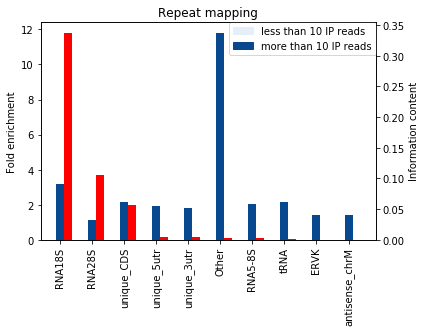

In [199]:
fig, ax = plt.subplots()
plot(ax=ax)

In [92]:
0.5/(5836117.0)

8.567340236667633e-08

In [189]:
sorted(parsed_files)

['/home/elvannostrand/scratch/EW_20170824/EW34_SRSF2_n212_diff_IP.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/scratch/EW_20170824/EW35_SRSF2_n212_diff_input.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/scratch/EW_20170824/EW36_SRSF2_C15-2_diff_IP.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/scratch/EW_20170824/EW37_SRSF2_C15-2_diff_input.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/scratch/EW_20170824/EW38_SRSF2_C1-2_diff_IP.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/scratch/EW_20170824/EW39_SRSF2_C1-2_diff_input.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/scratch/EW_20170824/EW40_SRSF2_P95L_C1-7_diff_IP.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/scratch/EW_20170824/EW41_SRSF2_P95L_C1-7_diff_input.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/scratch/EW_20170824/EW42_SRSF2_C1-8_diff_IP.combined_w_uniquemap.rmDup.sam.parsed',
 '/home/elvannostrand/